In [192]:
import csv
import pandas as pd
import mysql.connector
import numpy as np
import fonction as f
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_sql

sql_conn =  mysql.connector.connect(host='213.190.6.22', database='u485051925_tecog', user='u485051925_cogueur',  password='Josiana34')
#sql_conn =  mysql.connector.connect(host='localhost', database='te_cog', user='root',  password='')
query = "SELECT * FROM digit"
data = pd.read_sql(query, sql_conn)

df = data.set_index(['id_sujet', 'serie','trial', 'item'])
df['correct'] = pd.to_numeric(df['correct'])
df.to_csv('digits.csv')
df


correct key_press correct_response        rt  \
id_sujet serie trial item                                                 
1        1     1     1         NaN         1                4   434.400   
                     2         NaN         1                6   206.940   
                     3         NaN         1                7   189.310   
               2     1         NaN         4                3   641.555   
                     2         NaN         9                5     8.590   
...                            ...       ...              ...       ...   
2        4     14    4         1.0         2                2  1116.430   
                     5         NaN         7                4  1005.440   
                     6         NaN         6                1  1175.520   
                     7         NaN         5                9   593.495   
                     8         NaN         1                7   703.510   

                           time_elapsed     test_part  
id_sujet serie trial item                              
1        1     1     1             6524   trial_1_1_1  
                     2             6732   trial_1_1_2  
                     3             6922   trial_1_1_3  
               2     1            13073   trial_1_2_1  
                     2            13082   trial_1_2_2  
...                                 ...           ...  
2        4     14    4          1120311  trial_4_14_4  
                     5          1121317  trial_4_14_5  
                     6          1122493  trial_4_14_6  
                     7          1123087  trial_4_14_7  
                     8          1123791  trial_4_14_8  

[752 rows x 6 columns]

In [194]:
print('Nb participants :', len(sujets))

Nb participants : 2


In [196]:
query = "SELECT * FROM sujets"
sujets = pd.read_sql(query, sql_conn)
sujets

,id_sujet,code_sujet
0,1,test
1,2,test


In [198]:
scores = []
indexSujets = []
nbSeries = 4
for i in sujets['id_sujet']:
    #print('Sujet', i)
    series = []
    indexSujets.append(i)
    for j in range(nbSeries):
        s = np.sum(f.scoring(df.xs(i).xs(j+1)))
        series.append(s)
    #print(series)
    scores.append(series)
scores = pd.DataFrame(scores, index=indexSujets, columns=['Série 1', 'Série 2', 'Série 3', 'Série 4'])
scores


,Série 1,Série 2,Série 3,Série 4
1,0,0,0,0
2,2,1,5,5


In [200]:
scores.mean()

Série 1    1.0
Série 2    0.5
Série 3    2.5
Série 4    2.5
dtype: float64

In [202]:
sujets_score = [[],[],[]]

for i in sujets['id_sujet']:
    series = []
    indexSujets.append(i)
    for j in range(nbSeries):
        sujets_score[0].append(i)
        sujets_score[1].append(j+1)
        sujets_score[2].append(np.sum(f.scoring(df.xs(i).xs(j+1))))


sujets_score = pd.DataFrame(sujets_score).transpose()
sujets_score.columns = ['Sujets', 'Séries', 'Score']
sujets_score

,Sujets,Séries,Score
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,2,1,2
5,2,2,1
6,2,3,5
7,2,4,5


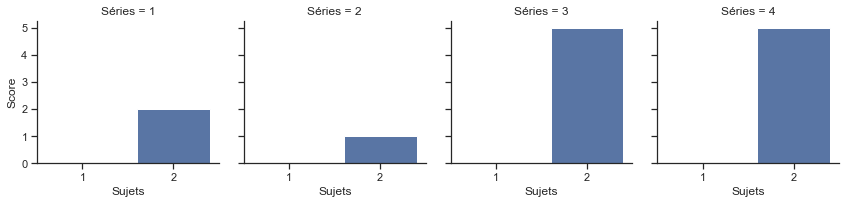

In [204]:
sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(sujets_score, col="Séries")
g.map(sns.barplot, "Sujets", "Score");

In [206]:
sujets_score.groupby("Séries").mean()

,Sujets,Score
Séries,,
1,1.5,1.0
2,1.5,0.5
3,1.5,2.5
4,1.5,2.5


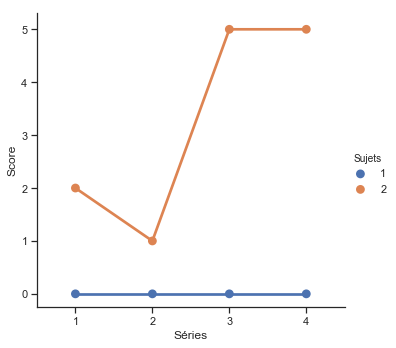

In [208]:
sns.catplot(x="Séries", y="Score", hue="Sujets", kind="point", data=sujets_score);

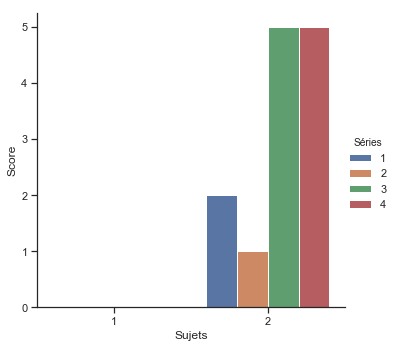

In [210]:
sns.catplot(x="Sujets", y="Score", kind="bar", hue="Séries", data=sujets_score);